In [142]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# np.random.seed(19680801)

## Why Use a Computer Simulation
* To provide counterexamples to proposed theorems
* to build intuition by experimenting with random numbers
* to lend evidence to a conjecture

Conjecture: an opinion or conclusion formed on the basis of incomplete information

### What are the probabilities of summed outcomes on k random experiments?
U1 <- [0,1]
U2 <- [0,1]
U1 + U2 <- [0,2]

Based on the below simulation, we observe that is far more likely that the values are around 1 rather than at 0 or 2.
For the value of U1 + U2 to be near 0 or 2 both of them should be near 0 or 2 at once. Where as for the value to be near 1 there is more flexibility - (0.5, 0.5) , (0,75, 0.25), (0.2, 0.8)

If we add more and more random experiments, we will obtain a Gaussian-shaped histogram - intuition for Central Limit Theorem

<IPython.core.display.Javascript object>


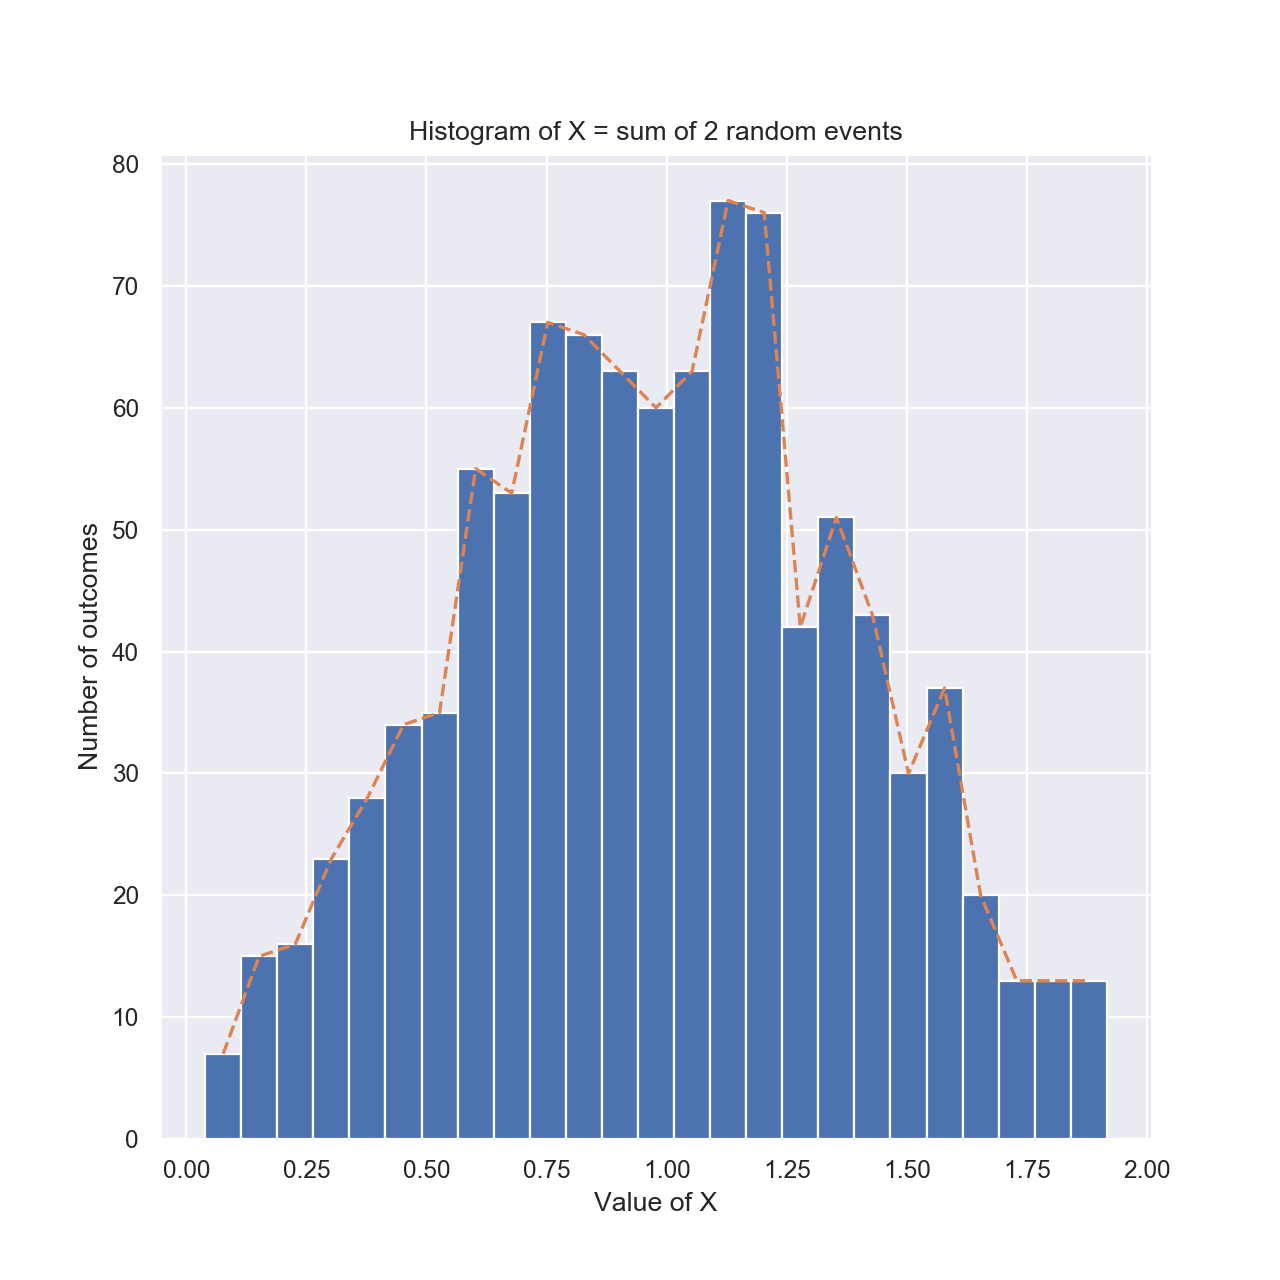

In [248]:
n = 1000 # no:of experiments
k = 2    # no:of random events
x = np.random.random_sample((n,k)) # each row will be 1000 runs of one experiment
X = np.sum(x, axis=1) # summing the outcomes of each run


fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
h = plt.hist(X, bins=25)
plt.ylabel('Number of outcomes')
plt.xlabel('Value of X')
plt.title('Histogram of X = sum of %s random events'%(k,))

mean_of_intervals = [(h[1][i]+h[1][i+1])/2 for i in range(len(h[1])-1)]
values_of_intervals = h[0]
plt.plot(mean_of_intervals, values_of_intervals, '--')

### Notations

* We define a random variable X as the numerical outcome of the random experiment both discrete and continuous.
* We denote the random variable by a capital letter, say X, and its possible values by a small letter, say xi for the discrete case and x for the continuous case.
* The number of experiments, which is sometimes referred to as the number of trials, will be denoted by M.
* The values of X obtained through simulation / experiment are termed the "outcomes" or "realizations" of X.

### Probability Density Function (pdf)

<IPython.core.display.Javascript object>


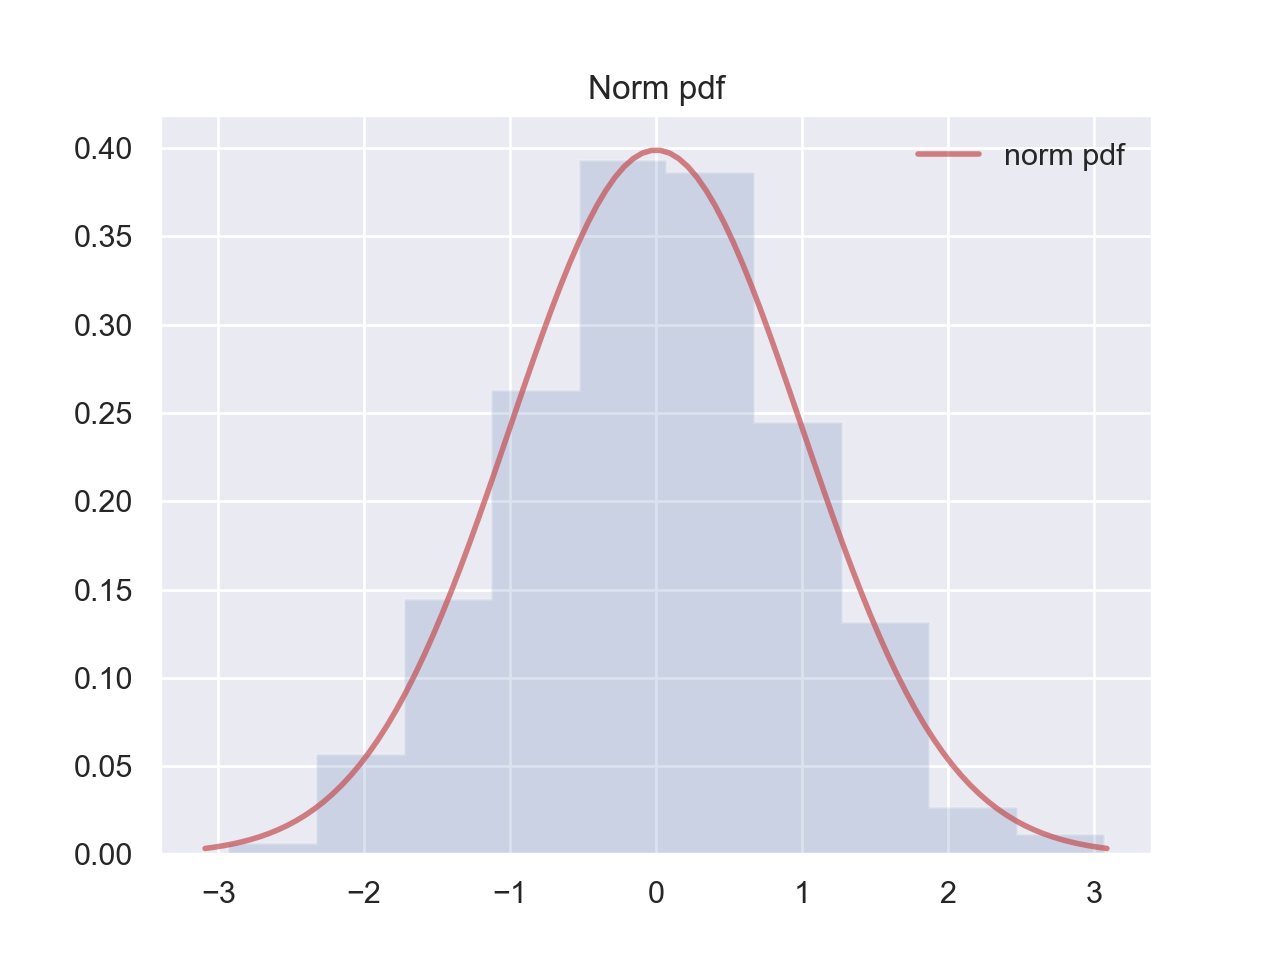

Text(0.5, 1.0, 'Norm pdf')

In [127]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

from scipy.stats import norm

# ppf(q, loc=0, scale=1) - Percent point function (inverse of cdf — percentiles).
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=2, alpha=0.7, label='norm pdf')

# rvs(loc=0, scale=1, size=1, random_state=None) - Random variates.
r = norm.rvs(size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.title('Norm pdf')

### Probability of an interval - Area Under pdf

norm.cdf - cumulative density function is the integral of standard gaussian pdf

What is the probability of X = P[a <= X <= b]

P[-0.3 <= X <= 1] = 0.45925616825749555


<IPython.core.display.Javascript object>


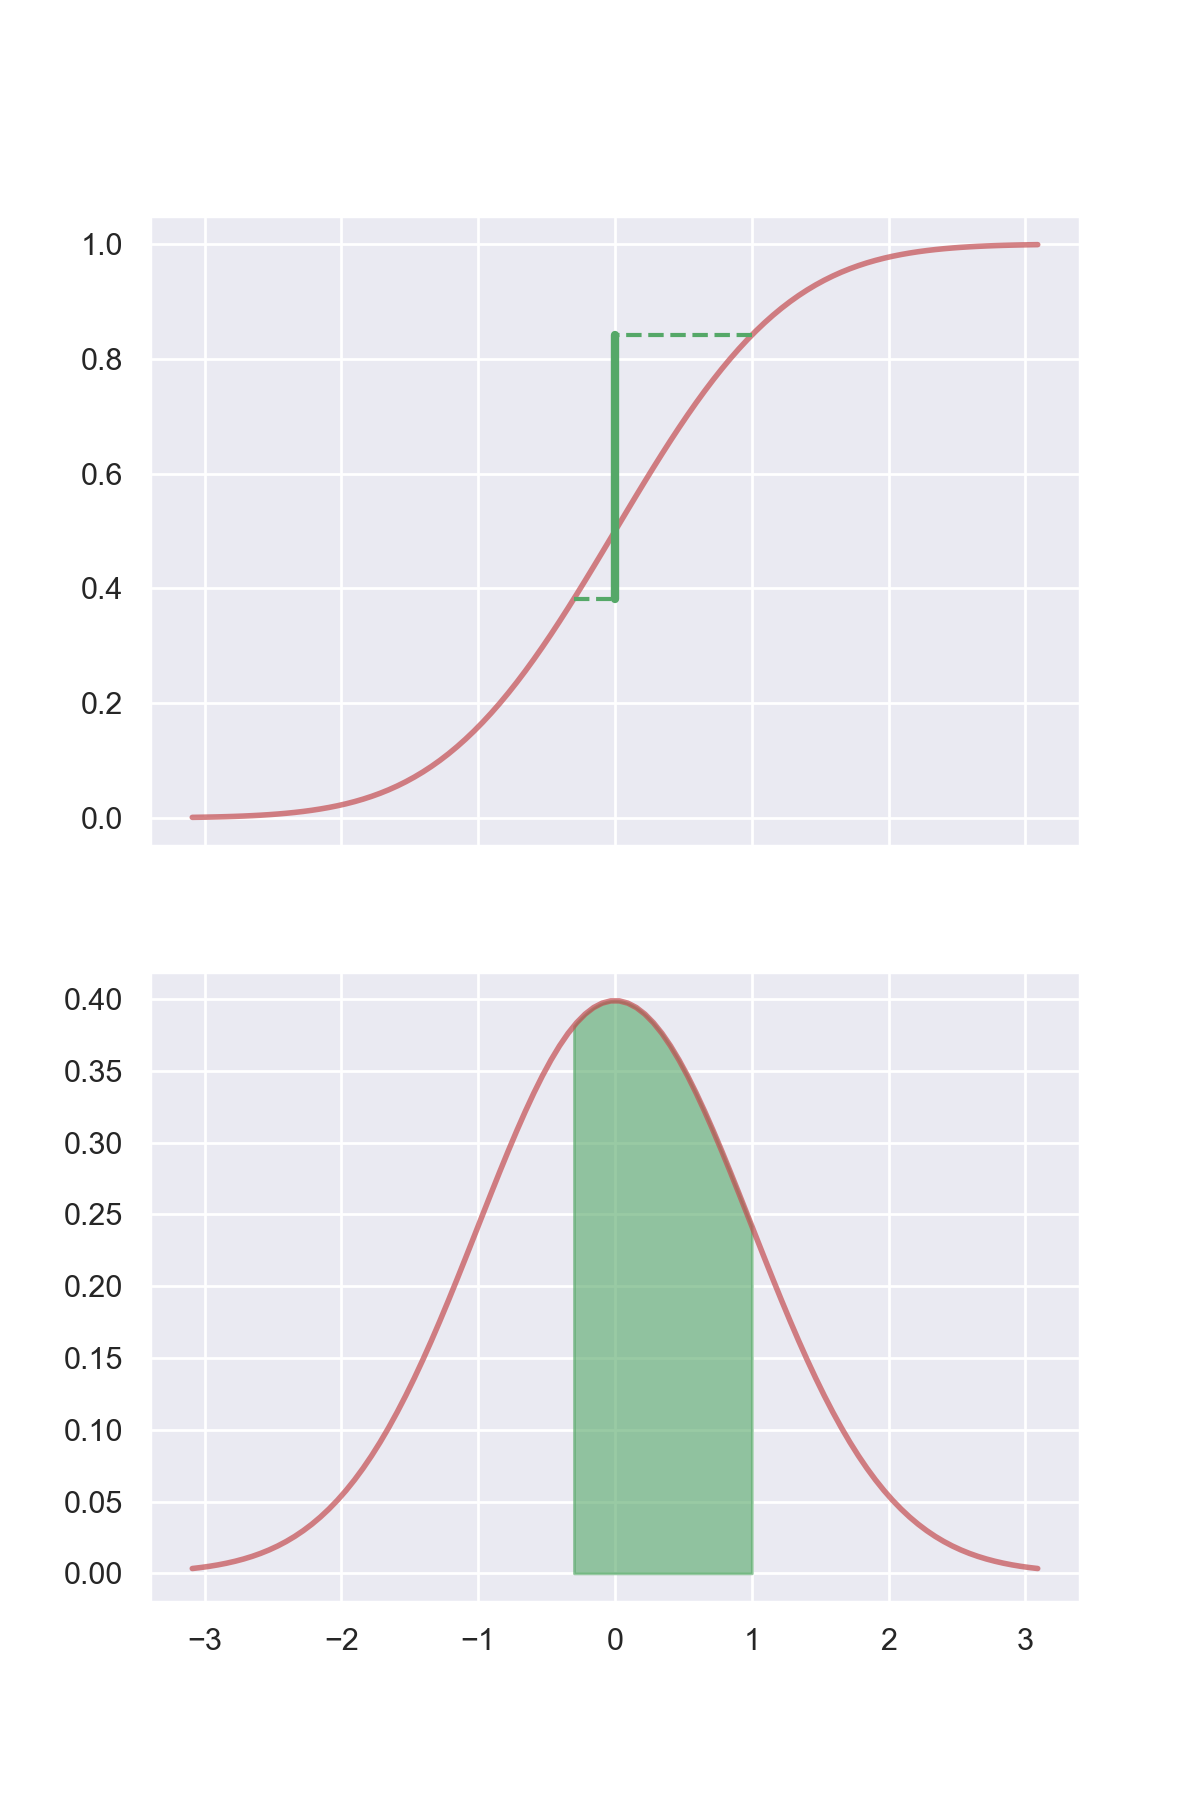

In [180]:
a,b = (-0.3, 1)

P = norm.cdf(b) - norm.cdf(a)
print('P[%s <= X <= %s] ='%(a,b), P)

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', sharey='row',figsize=(6, 9))
ax1.plot(x, norm.cdf(x), 'r-', lw=2, alpha=0.7, label='norm cdf')

ax1.plot([a, 0], [norm.cdf(a), norm.cdf(a)], 'g--')
ax1.plot([0, 0], [norm.cdf(a), norm.cdf(b)], 'g', lw=3)
ax1.plot([b, 0], [norm.cdf(b), norm.cdf(b)], 'g--')

ax2.plot(x, norm.pdf(x), 'r-', lw=2, alpha=0.7, label='norm pdf')
x = np.linspace(a,b)
ax2.fill_between(x, norm.pdf(x), color='g', alpha=0.6)

### A transformed random variable

One of the most important problems in probability is to determine the PDF for a transformed random variable, i.e., one that is a function of X, say X2 as an example.



<IPython.core.display.Javascript object>


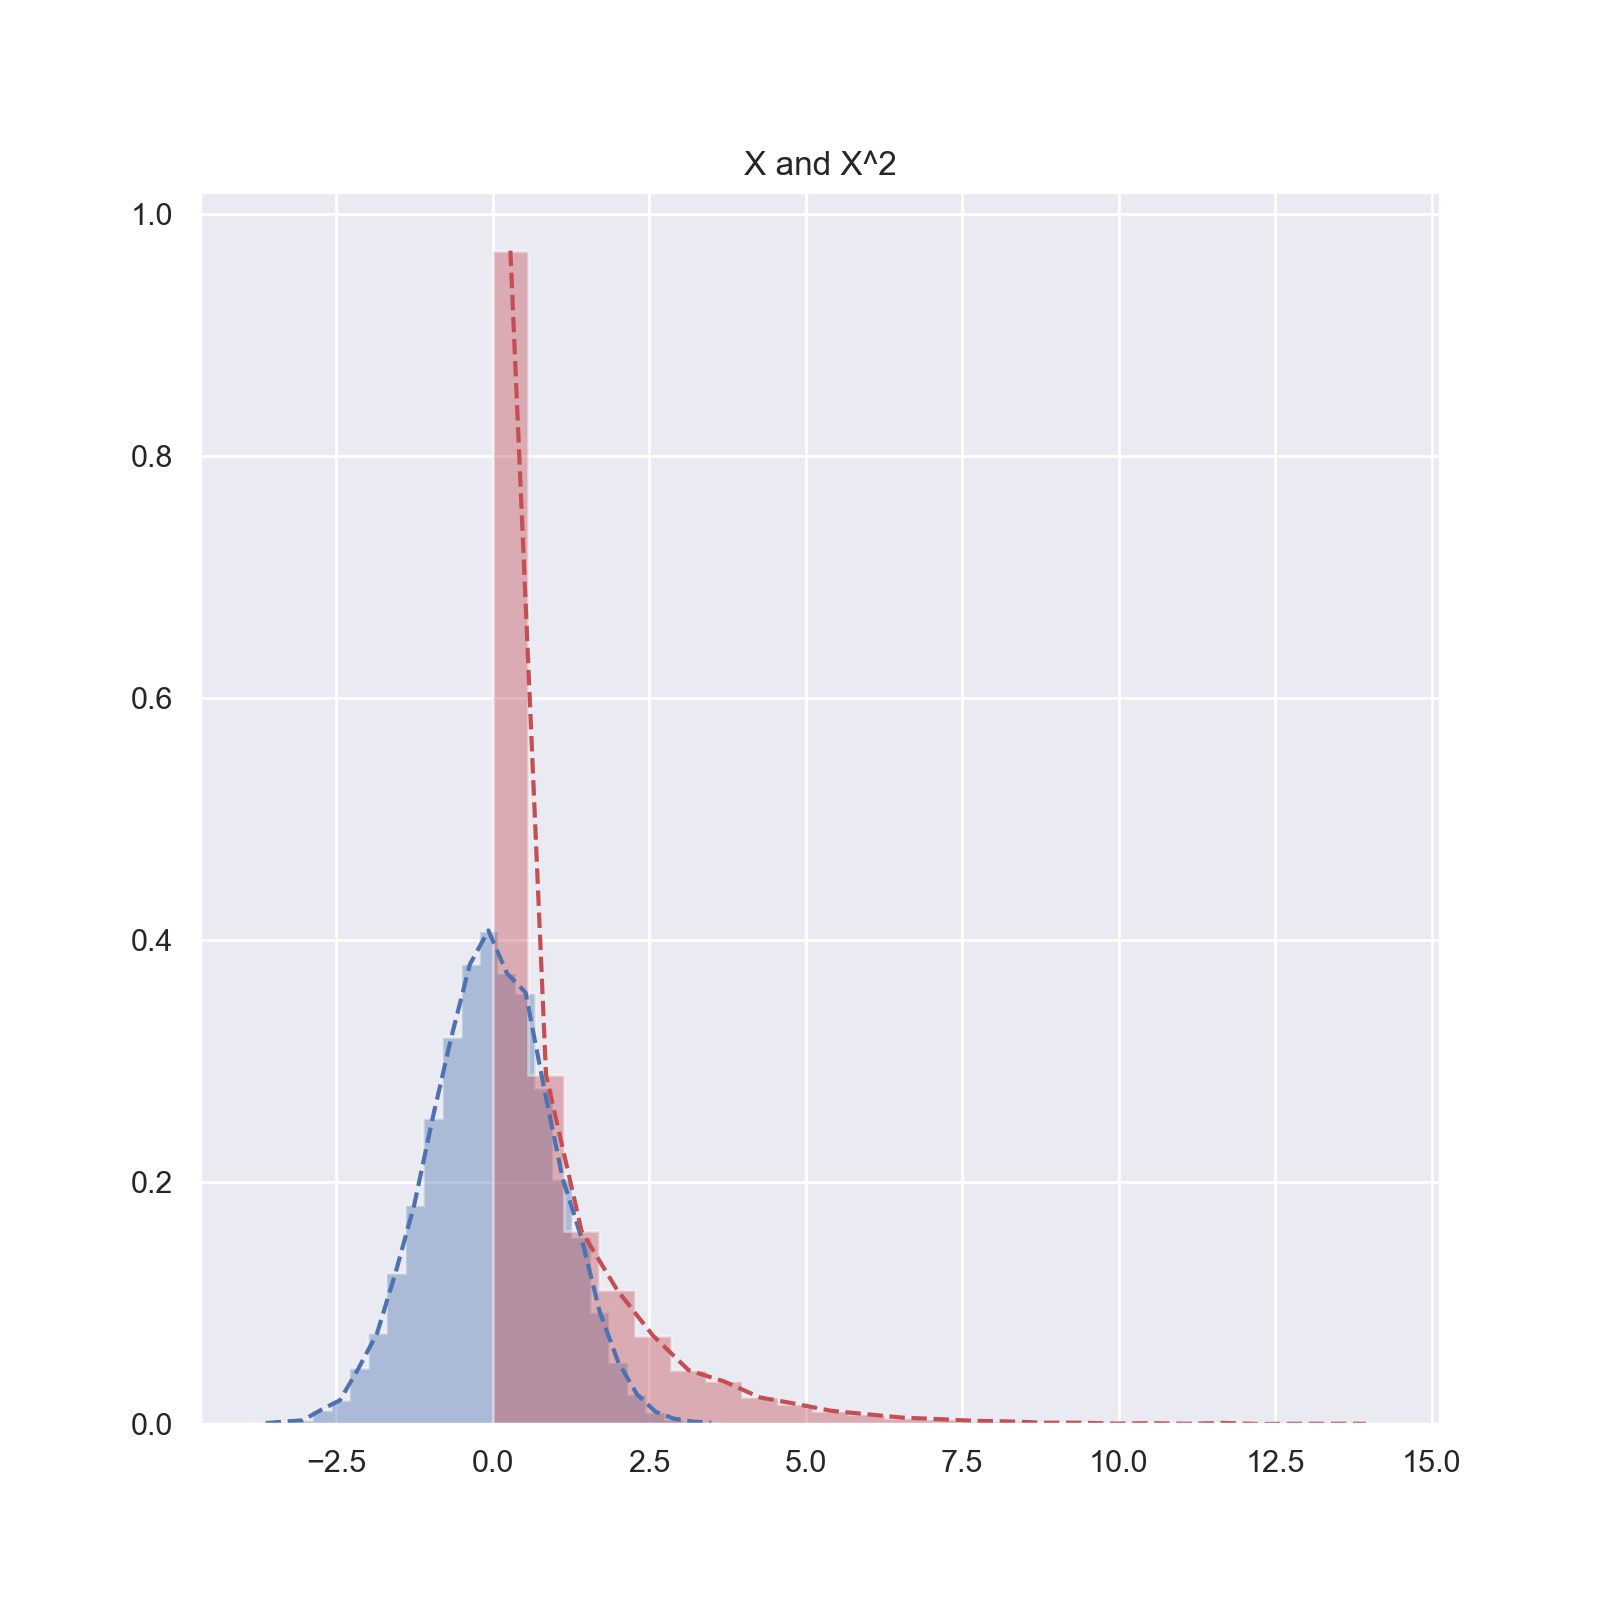

Text(0.5, 1.0, 'X and X^2')

In [239]:
def draw_hist_with_curve(ax, x, color, bins=25):
    h = ax.hist(x, density=True, bins=bins, color=color, histtype='stepfilled', alpha=0.4)
    mean_of_intervals = [(h[1][i]+h[1][i+1])/2 for i in range(len(h[1])-1)]
    values_of_intervals = h[0]
    ax.plot(mean_of_intervals, values_of_intervals, color+'--')


fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(8, 8))

# random values from the normal Gaussian distribution
r = norm.rvs(size=10000)
draw_hist_with_curve(ax, r, 'b')

# squaring the random values from the normal Gaussian distribution
r2 = r**2
draw_hist_with_curve(ax, r2, 'r')
plt.title('X and X^2')

<IPython.core.display.Javascript object>


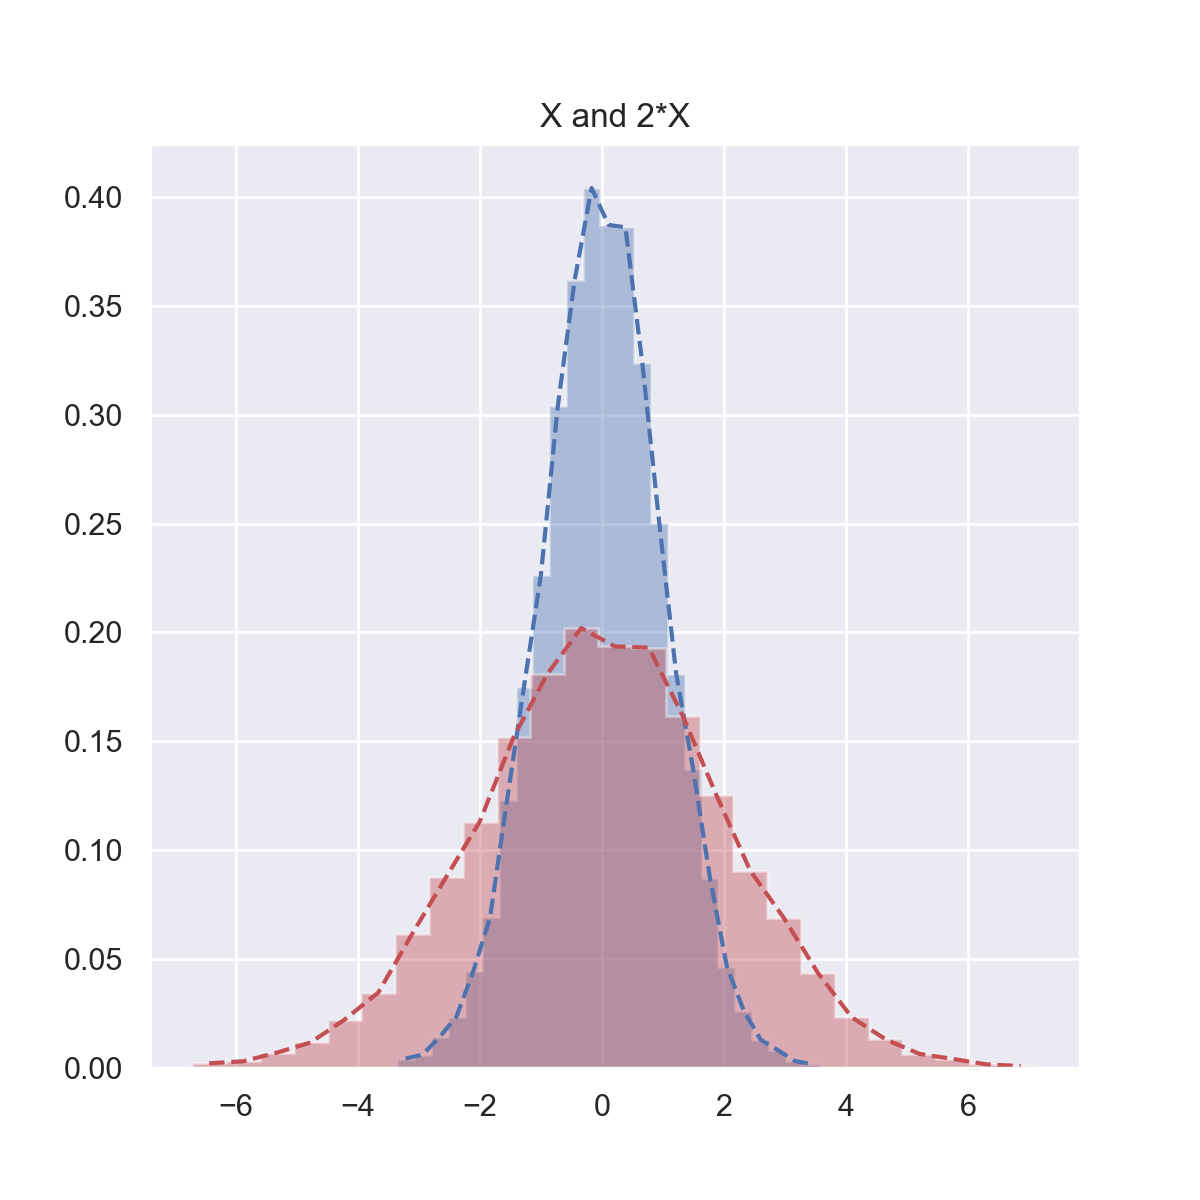

Text(0.5, 1.0, 'X and 2*X')

In [244]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(6, 6))

# random values from the normal Gaussian distribution
r = norm.rvs(size=10000)
draw_hist_with_curve(ax, r, 'b')

# squaring the random values from the normal Gaussian distribution
r2 = r*2
draw_hist_with_curve(ax, r2, 'r')
plt.title('X and 2*X')

### Multiple random variables

Consider an experiment with two outcomes which are random. [X1, X2]. 

If we plot (X1, X2) on XY plane, the points would lie in 1 by 1 square.

<IPython.core.display.Javascript object>


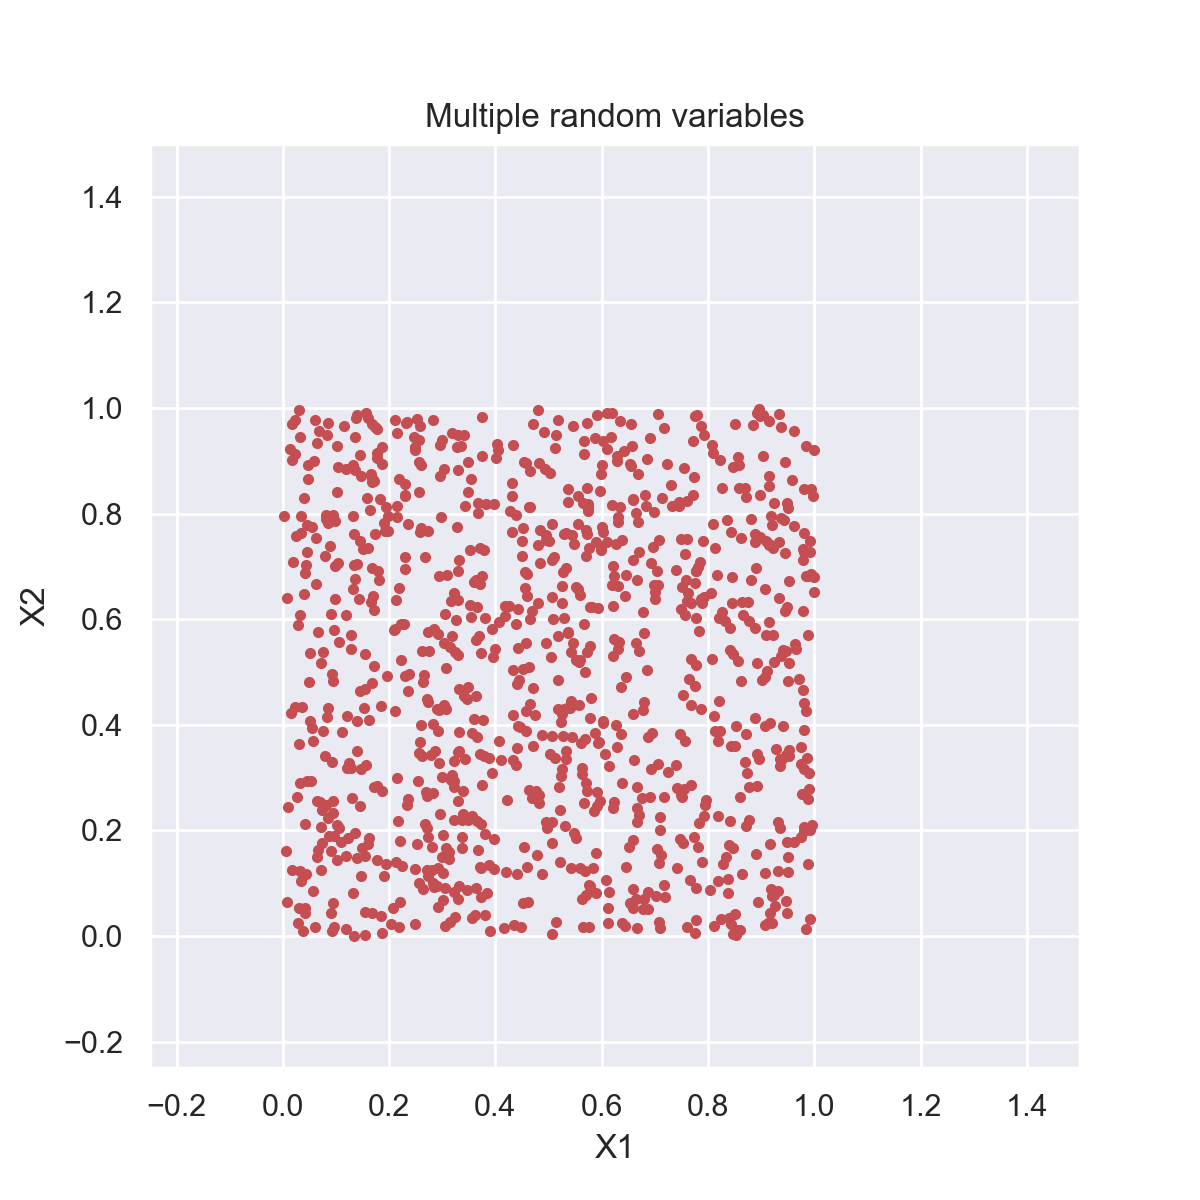

Text(0.5, 1.0, 'Multiple random variables')

In [230]:
M = 1000
X1 = np.random.random_sample((M,))
X2 = np.random.random_sample((M,))

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(6, 6))
ax.plot(X1, X2, 'r.')
plt.xlim([-0.25, 1.5])
plt.ylim([-0.25, 1.5])
plt.ylabel('X2')
plt.xlabel('X1')
plt.title('Multiple random variables')

<IPython.core.display.Javascript object>


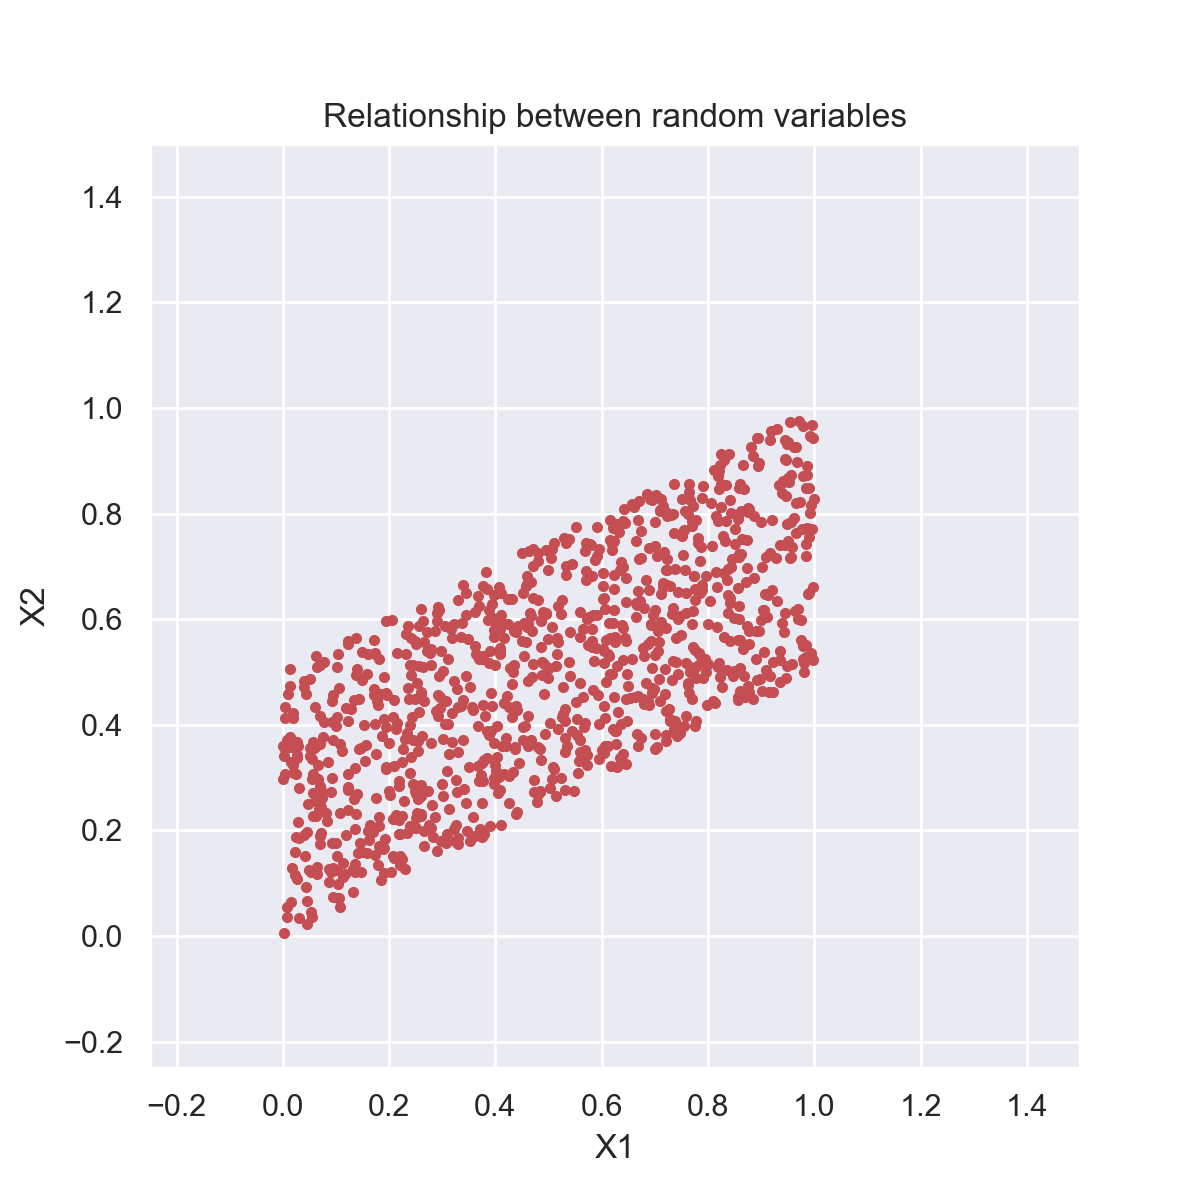

Text(0.5, 1.0, 'Relationship between random variables')

In [232]:
M = 1000
U1 = np.random.random_sample((M,))
U2 = np.random.random_sample((M,))

X1 = U1
X2 = 0.5*U1 + 0.5*U2

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(6, 6))
ax.plot(X1, X2, 'r.')
plt.xlim([-0.25, 1.5])
plt.ylim([-0.25, 1.5])
plt.ylabel('X2')
plt.xlabel('X1')
plt.title('Relationship between random variables')